<br>
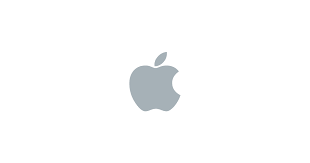

<h1 align='center'> Forecasting Stock Price with Long Short Term Memory (LSTM) Network </h1>
<h2 align='center'> <font color='#FC7307'> Assessment Group Project - Group 2 </font> </h2>
<h3 align='center'> <font color='#FC7308'> Rui Cai, Wenyi Hu, Rao (Ryan) Lu, Nawaz Quraishi</font> </h3>
<br>

### <a name='#toc'></a> Table of Contents

1. Import
2. Load Data - appl_data
3. Feature Engineering
4. EDA
5. ML
    1. Data Preprocessing
    2. Setup LSTM Network
    3. Train LSTM Model
    4. Evaluate LSTM Model
    5. Prediction Visualization
    6. Code All-in-one to predict 'High'

# 1. Import

In [1]:
#!pip install tensorflow

In [2]:
# import libraries
import pandas as pd
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

from plotly import subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 2. Load Data - appl_data
Download CSV file from the Open data source:
- https://finance.yahoo.com/quote/AAPL/chart?p=AAPL#eyJpbnRlcnZhbCI6IndlZWsiLCJwZXJpb2RpY2l0eSI6MSwidGltZVVuaXQiOm51bGwsImNhbmRsZVdpZHRoIjoxMC45NjE1Mzg0NjE1Mzg0NjIsImZsaXBwZWQiOmZhbHNlLCJ2b2x1bWVVbmRlcmxheSI6dHJ1ZSwiYWRqIjp0cnVlLCJjcm9zc2hhaXIiOnRydWUsImNoYXJ0VHlwZSI6ImxpbmUiLCJleHRlbmRlZCI6ZmFsc2UsIm1hcmtldFNlc3Npb25zIjp7fSwiYWdncmVnYXRpb25UeXBlIjoib2hsYyIsImNoYXJ0U2NhbGUiOiJsaW5lYXIiLCJwYW5lbHMiOnsiY2hhcnQiOnsicGVyY2VudCI6MSwiZGlzcGxheSI6IkFBUEwiLCJjaGFydE5hbWUiOiJjaGFydCIsImluZGV4IjowLCJ5QXhpcyI6eyJuYW1lIjoiY2hhcnQiLCJwb3NpdGlvbiI6bnVsbH0sInlheGlzTEhTIjpbXSwieWF4aXNSSFMiOlsiY2hhcnQiLCLigIx2b2wgdW5kcuKAjCJdfX0sInNldFNwYW4iOnsibXVsdGlwbGllciI6MiwiYmFzZSI6InllYXIiLCJwZXJpb2RpY2l0eSI6eyJwZXJpb2QiOjEsImludGVydmFsIjoid2VlayJ9LCJtYWludGFpblBlcmlvZGljaXR5Ijp0cnVlLCJmb3JjZUxvYWQiOnRydWV9LCJsaW5lV2lkdGgiOjIsInN0cmlwZWRCYWNrZ3JvdW5kIjp0cnVlLCJldmVudHMiOnRydWUsImNvbG9yIjoiIzAwODFmMiIsInN0cmlwZWRCYWNrZ3JvdWQiOnRydWUsImV2ZW50TWFwIjp7ImNvcnBvcmF0ZSI6eyJkaXZzIjp0cnVlLCJzcGxpdHMiOnRydWV9LCJzaWdEZXYiOnt9fSwic3ltYm9scyI6W3sic3ltYm9sIjoiQUFQTCIsInN5bWJvbE9iamVjdCI6eyJzeW1ib2wiOiJBQVBMIiwicXVvdGVUeXBlIjoiRVFVSVRZIiwiZXhjaGFuZ2VUaW1lWm9uZSI6IkFtZXJpY2EvTmV3X1lvcmsifSwicGVyaW9kaWNpdHkiOjEsImludGVydmFsIjoid2VlayIsInRpbWVVbml0IjpudWxsLCJzZXRTcGFuIjp7Im11bHRpcGxpZXIiOjIsImJhc2UiOiJ5ZWFyIiwicGVyaW9kaWNpdHkiOnsicGVyaW9kIjoxLCJpbnRlcnZhbCI6IndlZWsifSwibWFpbnRhaW5QZXJpb2RpY2l0eSI6dHJ1ZSwiZm9yY2VMb2FkIjp0cnVlfX1dLCJjdXN0b21SYW5nZSI6bnVsbCwic3R1ZGllcyI6eyLigIx2b2wgdW5kcuKAjCI6eyJ0eXBlIjoidm9sIHVuZHIiLCJpbnB1dHMiOnsiaWQiOiLigIx2b2wgdW5kcuKAjCIsImRpc3BsYXkiOiLigIx2b2wgdW5kcuKAjCJ9LCJvdXRwdXRzIjp7IlVwIFZvbHVtZSI6IiMwMGIwNjEiLCJEb3duIFZvbHVtZSI6IiNmZjMzM2EifSwicGFuZWwiOiJjaGFydCIsInBhcmFtZXRlcnMiOnsid2lkdGhGYWN0b3IiOjAuNDUsImNoYXJ0TmFtZSI6ImNoYXJ0IiwicGFuZWxOYW1lIjoiY2hhcnQifX19fQ--

In [3]:
appl_data = pd.read_csv('AAPL.csv', index_col='Date')
appl_data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-07-27   93.709999   94.904999   93.480003   94.809998   93.640442   
2020-07-28   94.367500   94.550003   93.247498   93.252502   92.102165   
2020-07-29   93.750000   95.230003   93.712502   95.040001   93.867615   
2020-07-30   94.187500   96.297501   93.767502   96.190002   95.003433   
2020-07-31  102.885002  106.415001  100.824997  106.260002  104.949219   

               Volume  
Date                   
2020-07-27  121214000  
2020-07-28  103625600  
2020-07-29   90329200  
2020-07-30  158130000  
2020-07-31  374336800

In [4]:
print("Total number of days: ",appl_data.shape[0])
print("Total number of fields: ",appl_data.shape[1])

Total number of days:  504
Total number of fields:  6


In [5]:
print("Null values:",appl_data.isnull().sum())
print("NA values:", appl_data.isna().values.any())

Null values: Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
NA values: False


In [6]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 2020-07-27 to 2022-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6+ KB


In [7]:
appl_data.drop(['Adj Close'], axis=1,inplace=True)

In [8]:
appl_data.head()

Open        High         Low       Close     Volume
Date                                                                 
2020-07-27   93.709999   94.904999   93.480003   94.809998  121214000
2020-07-28   94.367500   94.550003   93.247498   93.252502  103625600
2020-07-29   93.750000   95.230003   93.712502   95.040001   90329200
2020-07-30   94.187500   96.297501   93.767502   96.190002  158130000
2020-07-31  102.885002  106.415001  100.824997  106.260002  374336800

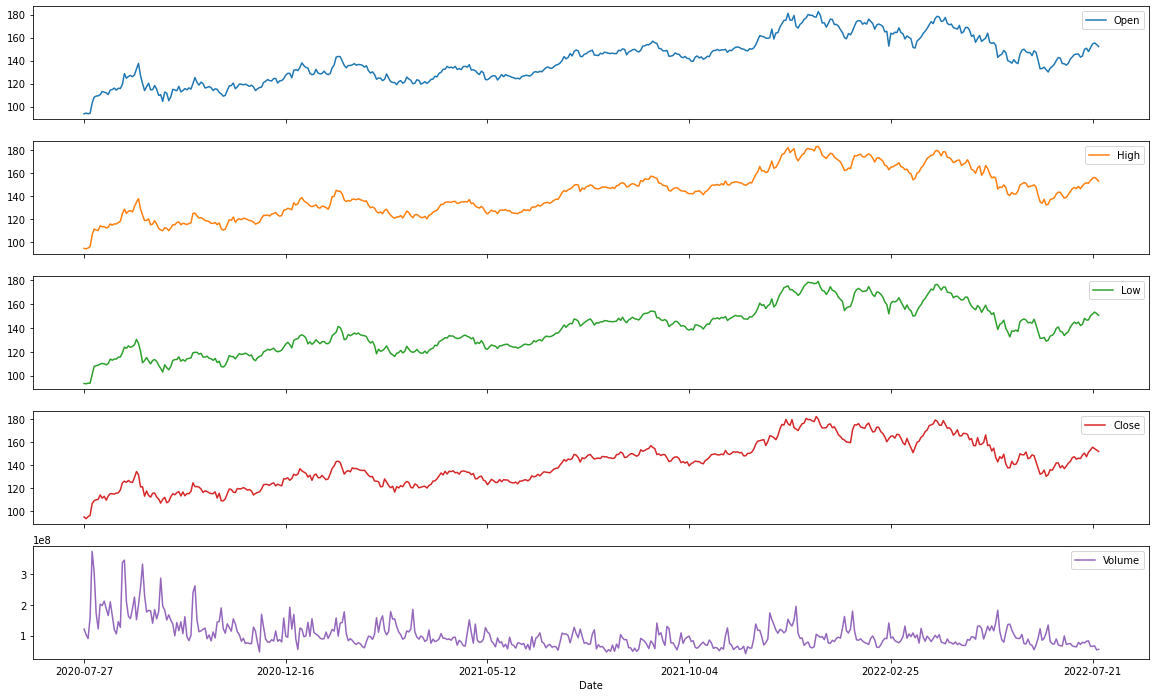

In [9]:
appl_data.plot(subplots=True, figsize=(20, 12))
plt.show()

# 3. Feature Engineering

In [10]:
appl_data['Change'] = appl_data.High.div(appl_data.High.shift())

Text(0.5, 1.0, 'Change in High price of Apple')

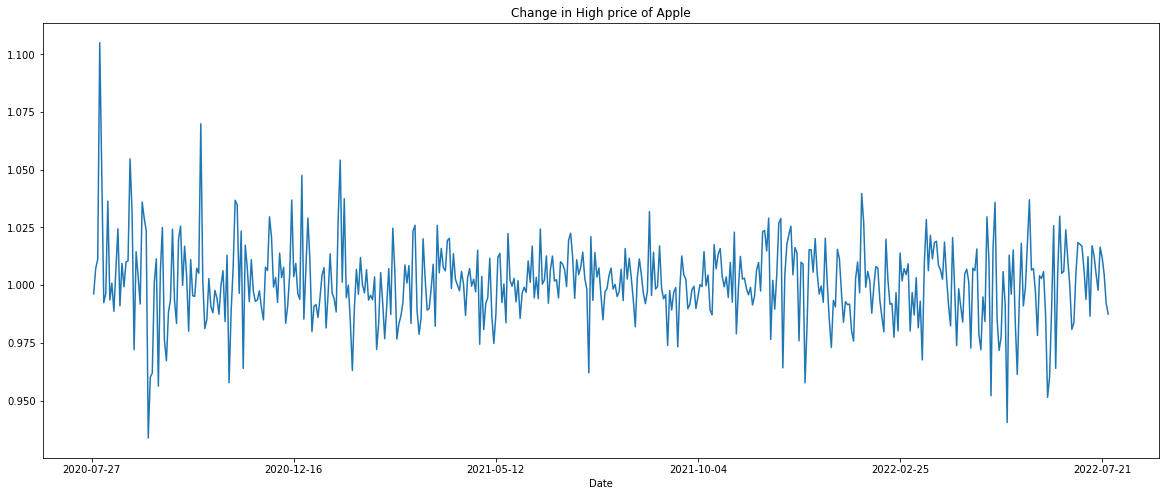

In [11]:
appl_data['Change'].plot(figsize=(20,8))
plt.title('Change in High price of Apple')

In [12]:
appl_data['Diff'] = appl_data.Close.subtract(appl_data.Open)

Text(0.5, 1.0, 'Difference of same day Open and Close price')

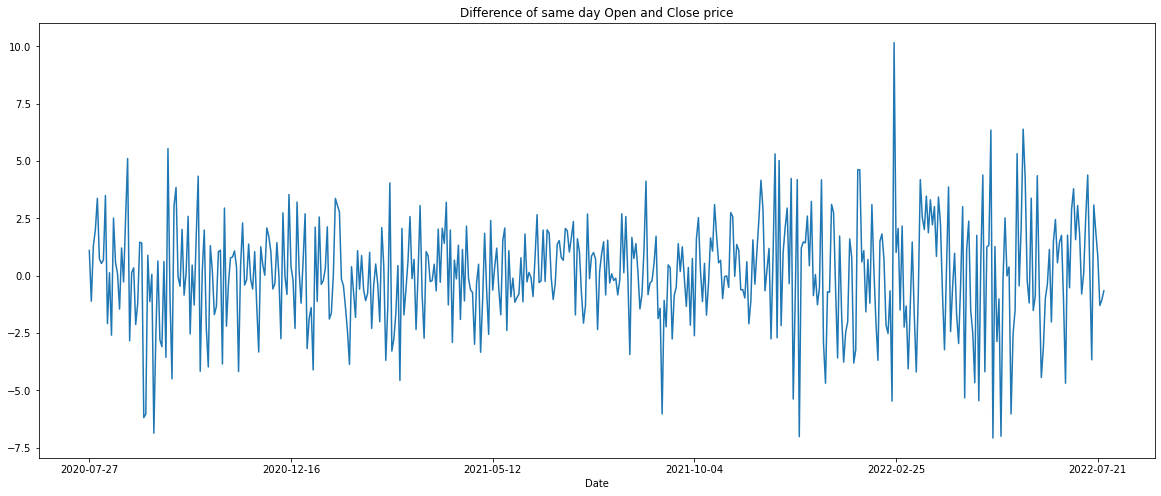

In [13]:
appl_data['Diff'].plot(figsize=(20,8))
plt.title('Difference of same day Open and Close price')

Text(0.5, 1.0, 'Difference of same day High and Low price')

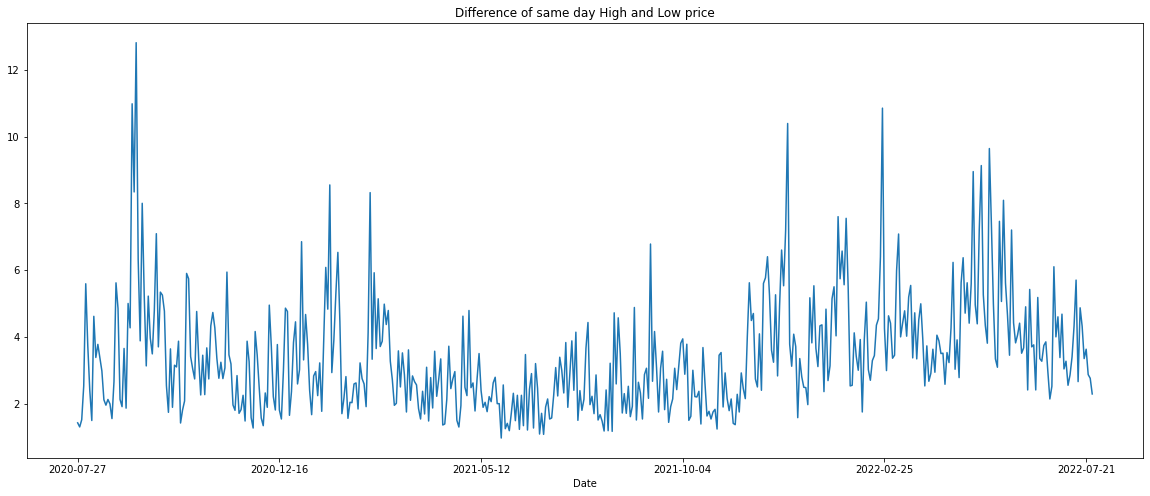

In [14]:
appl_data['Gap'] = appl_data.High.subtract(appl_data.Low)
appl_data['Gap'].plot(figsize=(20,8))
plt.title('Difference of same day High and Low price')

In [15]:
# move ['Close'] to the end of dataframe
apple_data = appl_data.drop(['Close'],axis=1)
apple_data = apple_data.merge(appl_data['Close'],left_on='Date',right_on='Date')
apple_data.head()

Open        High         Low     Volume    Change      Diff  \
Date                                                                            
2020-07-27   93.709999   94.904999   93.480003  121214000       NaN  1.099999   
2020-07-28   94.367500   94.550003   93.247498  103625600  0.996259 -1.114998   
2020-07-29   93.750000   95.230003   93.712502   90329200  1.007192  1.290001   
2020-07-30   94.187500   96.297501   93.767502  158130000  1.011210  2.002502   
2020-07-31  102.885002  106.415001  100.824997  374336800  1.105065  3.375000   

                 Gap       Close  
Date                              
2020-07-27  1.424996   94.809998  
2020-07-28  1.302505   93.252502  
2020-07-29  1.517501   95.040001  
2020-07-30  2.529999   96.190002  
2020-07-31  5.590004  106.260002

In [16]:
apple_data.dropna(inplace=True)

In [17]:
apple_data.shape

(503, 8)

# 4. EDA

In [18]:
# reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm
# https://towardsdatascience.com/time-series-forecasting-with-machine-learning-b3072a5b44ba

#df = df.reset_index()
fig1 = go.Figure(go.Scatter(x = apple_data.index, 
                           y = apple_data['Close'], 
                           line = dict(color = '#0099C6', width = 3)))
fig1.update_layout(width = 750,
                   height = 500,
                   title = 'Apple Daily Stock Closing Price From Jul 26, 2020 to Jul 26, 2022',
                   yaxis_tickprefix = '$',
                   margin = dict(l = 100, r = 20, t = 70, b = 70),
                   paper_bgcolor = 'rgb(248, 248, 255)',
                   plot_bgcolor='rgb(248, 248, 255)'
                  )

fig1.show()

In [19]:
fig2 = go.Figure(go.Scatter(x = apple_data.index, 
                           y = apple_data['Volume'], 
                           line = dict(color = 'rgb(229, 134, 6)', width = 3)))
fig2.update_layout(width = 750,
                   height = 500,
                   title = 'Apple Daily Stock Exchange Volume From Jul 26, 2020 to Jul 26, 2022',
                   margin = dict(l = 100, r = 20, t = 70, b = 70),
                   paper_bgcolor = 'rgb(248, 248, 255)',
                   plot_bgcolor='rgb(248, 248, 255)'
                  )

fig2.show()

In [20]:
fig3 = make_subplots(rows = 2, cols = 1, shared_xaxes = True)

fig3.append_trace(go.Scatter(x = apple_data.index, 
                           y = apple_data['Close'],
                           line = dict(color = '#0099C6', width = 3),
                            name = 'Daily Close Price'),
                  
                  row = 1, 
                  col = 1
                 )

fig3.append_trace(go.Scatter(x = apple_data.index, 
                           y = apple_data['Volume'], 
                           line = dict(color = 'rgb(229, 134, 6)', width = 3),
                            name = 'Daily Exchange Volume'), 
                  row = 2, 
                  col = 1
                 )

# update layout
fig3.update_layout(width = 750,
                   height = 500,
                   title = 'Apple Daily Stock From Jul 26, 2020 to Jul 26, 2022',
                   yaxis_tickprefix = '$',
                   xaxis = dict(linecolor = 'rgba(102, 102, 102, 0.8)',
                                domain=[0, 0.95]
                               ),
                   xaxis2 = dict(linecolor = 'rgba(102, 102, 102, 0.8)',
                                 domain=[0, 0.95]
                                ),
                   yaxis = dict(domain = [0, 0.5]),
                   yaxis1 = dict(domain = [0.5, 1]),
                   legend = dict(x = .05, 
                                 y = 1, 
                                 font_size = 10),
                   margin = dict(l = 100, r = 20, t = 70, b = 70),
                   paper_bgcolor = 'rgb(248, 248, 255)',
                   plot_bgcolor='rgb(248, 248, 255)'
                  )


fig3.show()

In [21]:
moving_avg_day = [10, 30, 60]

for day in moving_avg_day:
        col = f'{day}-days moving average'
        apple_data[col] = apple_data['Close'].rolling(day).mean()
        
        
def add_line(figure, df, col, color_name):
    figure.add_trace(go.Scatter(x = df.index,
                                   y = df[col],
                                   name = col,
                                   line = dict(color = color_name, width = 3)
                                  )
                       )
    
fig4 = go.Figure()
col_names = ['Close',
             '10-days moving average', 
             '30-days moving average', 
             '60-days moving average']

for col, color_name in zip(col_names,['#0099C6', '#FD3216', 'rgb(237, 173, 8)', 'rgb(102, 166, 30)']):
    add_line(fig4, apple_data, col, color_name)

fig4.update_layout(width = 750,
                   height = 500,
                   title = 'Apple Stock Price Moving Average From Jul 26, 2020 to Jul 26, 2022',
                   legend = dict(x = .1, 
                                 y = 1.038, 
                                 font_size = 10),
                   paper_bgcolor = 'rgb(248, 248, 255)',
                   plot_bgcolor='rgb(248, 248, 255)'
                  )

fig4.show()

In [22]:
apple_data['Daily Return'] = apple_data['Close'].pct_change()

fig5 = go.Figure(go.Histogram(x = apple_data['Daily Return'],  
                              marker = dict(color = 'rgb(102, 166, 30)'
                                           )
                             )
                )

fig5.update_layout(width = 750,
                   height = 500,
                   title = 'Apple Stock Daily Returns From Jul 26, 2020 to Jul 26, 2022',
                   paper_bgcolor = 'rgb(248, 248, 255)',
                   plot_bgcolor='rgb(248, 248, 255)'
                  )

fig5.show()

In [23]:
result = seasonal_decompose(apple_data['Close'], model='additive', period=30)
observed = result.observed
trend = result.trend
seasonal = result.seasonal
residual = result.resid

fig6 = make_subplots(rows = 4, 
                     cols = 1,
                     shared_xaxes = True, 
                     subplot_titles=('OBSERVED', 'TREND', 'SEASONAL', 'RESIDUAL')
                    )
for item, i in zip([observed, trend, seasonal, residual], range(1, 5)):
    fig6.append_trace(go.Scatter(x = item.index, 
                                 y = item, 
                                 line = dict(color = '#0099C6', width = 3)
                                ),
                      row = i,
                      col = 1
                     )

fig6.update_layout(width = 750,
                   height = 500,
                   title = 'Apple Stock Decomposed Components From Jul 26, 2020 to Jul 26, 2022',
                   paper_bgcolor = 'rgb(248, 248, 255)',
                   plot_bgcolor='rgb(248, 248, 255)',
                   showlegend=False
                  )
fig6.update_annotations(font_size=11)

fig6.show()

# 5. ML
Reference:
1. https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827
2. https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

## 5.1 Data Preprocessing

In [24]:
#1. Extract data 
close_prices = apple_data['Close']
values = close_prices.values

#2. Scaling and reshape data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

step_size = 2 # define step_size
training_data_len = math.ceil(len(values)* 0.8) # define data size for train/test split

#3. Prepare the training set
train_data = scaled_data[0: training_data_len, :]
X_train = []
y_train = []
for i in range(step_size, len(train_data)):
    X_train.append(train_data[i-step_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#4. Prepare the testing set
test_data = scaled_data[training_data_len-step_size: , : ]
X_test = []
y_test = []
for i in range(step_size, len(test_data)):
    X_test.append(test_data[i-step_size:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(scaled_data.shape,train_data.shape,test_data.shape)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(503, 1) (403, 1) (102, 1)
(401, 2, 1) (401,) (100, 2, 1) (100,)


## 5.2 Setup LSTM Network

In [25]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


### Train LSTM Model

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
401/401 [==============================] - 4s 3ms/step - loss: 0.0116
Epoch 2/3
401/401 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 3/3
401/401 [==============================] - 1s 3ms/step - loss: 0.0020


## 5.3 Evaluate LSTM Model

In [27]:
y_pred =model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape =mean_absolute_percentage_error(y_test, y_pred)
print('RMSE:',rmse)
print('MAPE:',mape)

4/4 [==============================] - 1s 2ms/step
RMSE: 0.05456658021004409
MAPE: 0.0685792814979252


## 5.4 Prediction Visualization

C:\Users\MartinGuo\AppData\Local\Temp\ipykernel_908\941747148.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



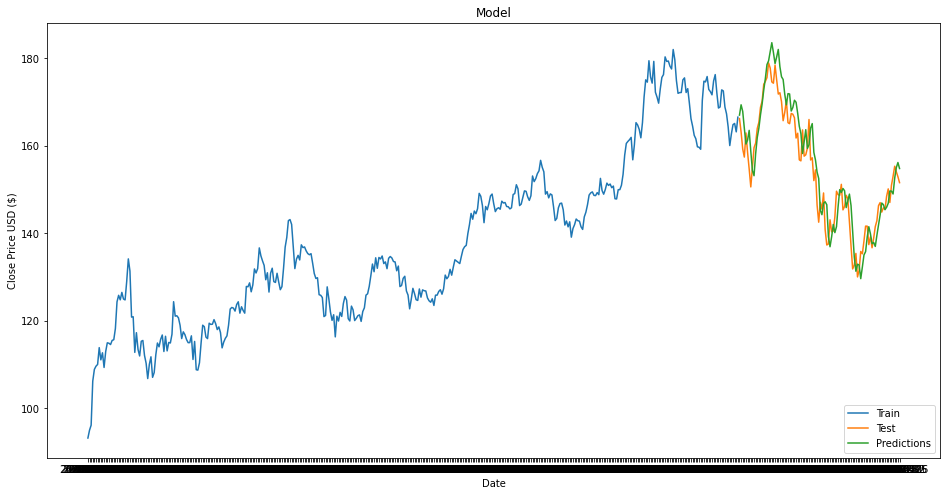

In [28]:
y_pred = scaler.inverse_transform(y_pred)

data = apple_data.filter(['Close'])
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = y_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

## 5.5 Code All-in-one to Predict 'High'

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 100)            40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
401/401 [==============================] - 5s 3ms/step - loss: 0.0110
Epoch 2/3
401/401 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 3/3
4/4 [=====

C:\Users\MartinGuo\AppData\Local\Temp\ipykernel_908\1757222776.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



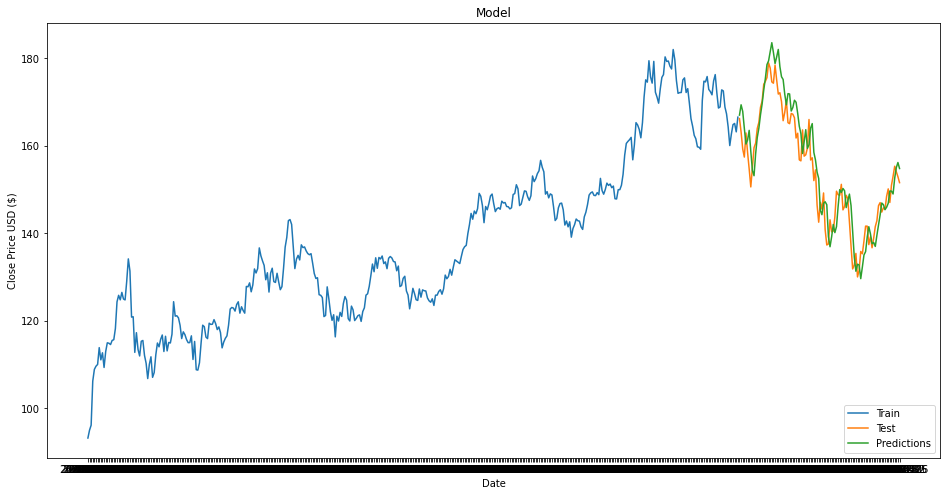

In [29]:
# Extract the 'High' prices and convert it to a number series
high_prices = apple_data['High']
high_values = high_prices.values
# Calculate the data size for 80% of the dataset
high_data_len = math.ceil(len(high_values)* 0.8)
# scaling all stock data and reshape the normalized data to 2-dimensional array
scaler = MinMaxScaler(feature_range=(0,1))
#scaler = StandardScaler()
scaled_data = scaler.fit_transform(high_values.reshape(-1,1))

step_size = 2
# prepare the training set
high_data = scaled_data[0: high_data_len, :]

X_high_train = []
y_high_train = []

for i in range(step_size, len(high_data)):
    X_high_train.append(high_data[i-step_size:i, 0])
    y_high_train.append(high_data[i, 0])
    
X_high_train, y_high_train = np.array(X_high_train), np.array(y_high_train)
X_high_train = np.reshape(X_high_train, (X_high_train.shape[0], X_high_train.shape[1], 1))

## prepare the training set
test_high_data = scaled_data[high_data_len-step_size: , : ]

X_high_test = []
y_high_test = []

for i in range(step_size, len(test_high_data)):
    X_high_test.append(test_high_data[i-step_size:i, 0])
    y_high_test.append(test_high_data[i, 0])

X_high_test, y_high_test = np.array(X_high_test), np.array(y_high_test)
X_high_test = np.reshape(X_high_test, (X_high_test.shape[0], X_high_test.shape[1], 1))

high = Sequential()
high.add(LSTM(100, return_sequences=True, input_shape=(X_high_train.shape[1], 1)))
high.add(LSTM(100, return_sequences=False))
high.add(Dense(25))
high.add(Dense(1))
high.summary()

# Compile the model
high.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
high.fit(X_high_train, y_high_train, batch_size=1, epochs=3)

y_high_pred =high.predict(X_high_test)

rmse = mean_squared_error(y_high_test, y_high_pred, squared=False)
#mape =mean_absolute_percentage_error(y_test, y_pred)
print(rmse)
#print(mape)

y_high_pred = scaler.inverse_transform(y_high_pred)

data = apple_data.filter(['Close'])
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = y_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()